# Part 1: Axes

An AxesSubplot is one (of possibly many) plots within a larger figure.

* subplots
* axis limits
* aspect ratios

#### Question: how much living area of new houses is in finished basements?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
df = pd.read_csv("new_houses.csv")
df.head()

,Address,YearBuilt,TotalLivingArea,FirstFloor,SecondFloor,ThirdFloor,Basement,FinishedBasement,LotSize
0,10008 Watts Rd,2019,1880,978,902,0,978,0,6475.0
1,10012 Watts Rd,2019,1572,1572,0,0,1572,0,6475.0
2,10016 Watts Rd,2019,2124,1122,1002,0,1122,0,6468.0
3,10020 Watts Rd,2019,2156,1124,1032,0,1124,0,7518.0
4,10023 Watts Rd,2019,2033,994,1039,0,994,0,8587.0


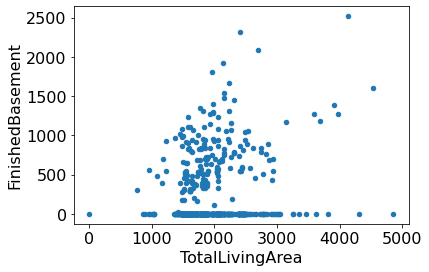

In [5]:
df.plot.scatter(x="TotalLivingArea", y="FinishedBasement")

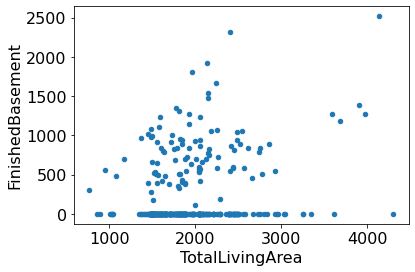

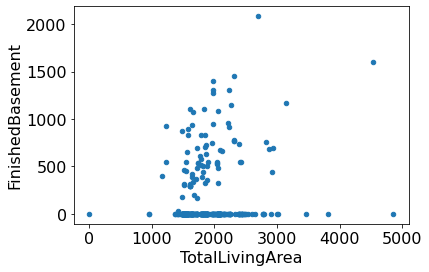

In [6]:
df[df["YearBuilt"] == 2019].plot.scatter(x="TotalLivingArea", y="FinishedBasement")
df[df["YearBuilt"] == 2020].plot.scatter(x="TotalLivingArea", y="FinishedBasement")

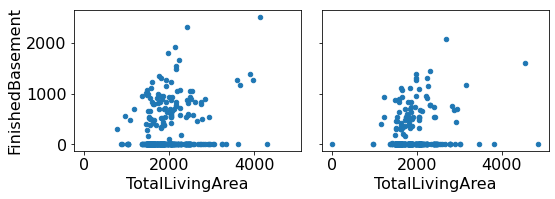

In [7]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3), sharex=True, sharey=True)
y19 = df[df["YearBuilt"] == 2019]
y20 = df[df["YearBuilt"] == 2020]
y19.plot.scatter(x="TotalLivingArea", y="FinishedBasement", ax=ax0)
y20.plot.scatter(x="TotalLivingArea", y="FinishedBasement", ax=ax1)
fig.tight_layout()

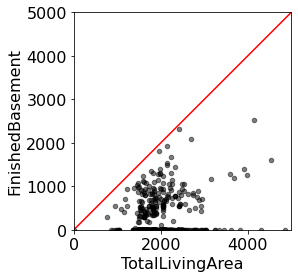

In [8]:
ax = df.plot.scatter(x="TotalLivingArea", y="FinishedBasement",
                     xlim=(0, 5000), ylim=(0, 5000), c="k", alpha=0.5)
ax.set_aspect(1)
pd.Series(ax.get_xlim(), index=ax.get_xlim()).plot.line(ax=ax, color="r")
assert ax.get_xlim()[1] >= df["TotalLivingArea"].max()
assert ax.get_ylim()[1] >= df["FinishedBasement"].max()

# Part 2: Log Scales

In [35]:
from math import log, log10, log2

In [36]:
log10(1000)

3.0

In [39]:
# approximation of the real log10
def log10ish(x):
    assert type(x) == int
    assert x >= 1
    return len(str(x))

log10ish(23456712359821355123)

20

In [42]:
errors = []
for i in range(1, 1000000):
    err = abs(log10(i) - log10ish(i))
    errors.append(err)
max(errors)

1.0

In [43]:
a = 234567123598213551235980162350961235
b = 123513212531235

In [46]:
log10(a)

35.37026714230456

In [47]:
log10(b)

14.091713417696777

### Example: Exponential Growth

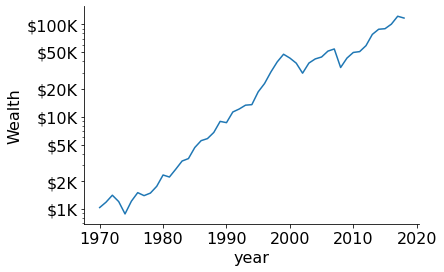

In [63]:
df = pd.read_csv("sp500.csv")
df = df.set_index("year")
start = 1000
df["wealth"] = df["return"].cumprod() * start
ax = df["wealth"].plot.line(logy=True)
ax.set_ylabel("Wealth")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
locations = [1000, 2000, 5000, 10000, 20000, 50000, 100000]
labels = []
for loc in locations:
    labels.append("$" + str(loc//1000) + "K")
ax.set_yticks(locations)
ax.set_yticklabels(labels)
None